In [1]:
import numpy as np
import pickle
import os
import sys
import lzma
import itertools as it
import string

import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp

import tqdm
import contextlib

import proplot as pplt

sys.path.append('../GDMaps_PCE/')
from DimensionReduction import Grassmann
from DimensionReduction import DiffusionMaps
from GDMaps_PCE_GSA_wLAR import *

from UQpy.distributions import Normal, Uniform, JointIndependent

# Plotting parameters
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["legend.fontsize"] = 12.5
mpl.rcParams["font.size"] = 13.5
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.alpha"] = 0.2
mpl.rcParams["axes.axisbelow"] = True
mpl.rcParams["figure.figsize"] = (6, 4)
mpl.rcParams["mathtext.fontset"] = "stix" # "cm"
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.titlesize'] = 15


USE_TEX = False

if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
    
plt.rc("font", family="serif")

mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [2]:
PATH_PT3 = "data/data_PT/data_3_param/"

# One run without fixing the seed

In [3]:
data = pickle.load(lzma.open(PATH_PT3+"output_data.pkl.lzma"))

# Micro level

In [4]:
ranks_micro = []
num_runs = 1

data_reshaped = data[:,:,:50].reshape(1, 5120, 250, 250)

for run in tqdm.tqdm(range(num_runs)):
    data_all = data_reshaped[run].astype(np.float32)
    ranks_micro += [np.linalg.matrix_rank(data_all[i]) for i \
         in range(len(data_all))]

unique_micro, counts_micro = np.unique(ranks_micro, return_counts=True)
print(f'Ranks: \n {np.asarray((unique_micro, counts_micro)).T}')

100%|█████████████████████████████████████████████| 1/1 [00:28<00:00, 28.10s/it]

Ranks: 
 [[ 80   1]
 [ 85   4]
 [ 87   1]
 [ 88   1]
 [ 89   4]
 [ 90   9]
 [ 91   3]
 [ 92   6]
 [ 93   4]
 [ 94   4]
 [ 95  32]
 [ 96   6]
 [ 97   4]
 [ 98   2]
 [ 99   5]
 [100  48]
 [101   6]
 [102   8]
 [103   4]
 [104  20]
 [105  78]
 [106  12]
 [107   6]
 [108  16]
 [109  14]
 [110  83]
 [111  31]
 [112  18]
 [113  25]
 [114  35]
 [115  85]
 [116  23]
 [117  19]
 [118  33]
 [119  45]
 [120 112]
 [121  28]
 [122  26]
 [123  37]
 [124  31]
 [125  99]
 [126  27]
 [127  22]
 [128  27]
 [129  38]
 [130  77]
 [131  30]
 [132  27]
 [133  27]
 [134  38]
 [135  57]
 [136  40]
 [137  39]
 [138  36]
 [139  34]
 [140  45]
 [141  31]
 [142  38]
 [143  42]
 [144  43]
 [145  38]
 [146  34]
 [147  28]
 [148  28]
 [149  28]
 [150  41]
 [151  24]
 [152  35]
 [153  29]
 [154  30]
 [155  37]
 [156  42]
 [157  28]
 [158  31]
 [159  31]
 [160  34]
 [161  29]
 [162  23]
 [163  35]
 [164  27]
 [165  33]
 [166  28]
 [167  24]
 [168  29]
 [169  28]
 [170  26]
 [171  31]
 [172  21]
 [173  20]
 [174  26]
 

In [5]:
micro_data_original_shape = data

# Meso level

In [6]:
with open(PATH_PT3+"communities.pickle", "rb") as f:
    communities = pickle.load(f)
community_keys = sorted(list(communities.keys()))

# not the same duplicates, as I did not save it
rand_comm_duplicates = list(np.random.choice(community_keys, size=4, replace=False))
community_keys += rand_comm_duplicates


In [7]:
data = pickle.load(lzma.open(PATH_PT3+"output_data.pkl.lzma"))
data = data[:,:,:50]
    
community_averages = np.zeros((5120, 32, 50))
for p_idx, param_item in enumerate(data):
    for k_idx, key in enumerate(community_keys):
        comm_avg = np.mean(param_item[communities[key]], axis=0)
        community_averages[p_idx][k_idx] = comm_avg
    
data_meso = community_averages.reshape(1, 5120, 40, 40)

In [8]:
ranks_meso = []
num_runs = 1

for run in tqdm.tqdm(range(num_runs)):
    data_all = data_meso[run].astype(np.float32)
    ranks_meso += [np.linalg.matrix_rank(data_all[i]) for i \
         in range(len(data_all))]

unique_meso, counts_meso = np.unique(ranks_meso, return_counts=True)
print(f'Ranks: \n {np.asarray((unique_meso, counts_meso)).T}')

# The ranks of the meso data actually used

# Ranks: 
#  [[ 33  23]
#  [ 34 228]
#  [ 35 921]
#  [ 36 891]
#  [ 37 825]
#  [ 38 819]
#  [ 39 748]
#  [ 40 665]]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.41it/s]

Ranks: 
 [[  33    1]
 [  34   36]
 [  35  272]
 [  36 1279]
 [  37 1356]
 [  38 1090]
 [  39 1086]]


In [9]:
unique_meso = [33, 34, 35, 36, 37, 38, 39, 40]
counts_meso = [23, 228, 921, 891, 825, 819, 748, 665]

In [10]:
meso_data_original_shape = data_meso.reshape(5120, 32, 50)

# Macro level

In [11]:
mean_agent_responses = np.mean(data, axis=1)[:,:49]

In [12]:
macro_data = mean_agent_responses.astype(np.float32).reshape(1, 5120, 7, 7)

ranks_macro = []

data_all = macro_data[0]
ranks_macro += [np.linalg.matrix_rank(data_all[i]) for i \
     in range(len(data_all))]

unique_macro, counts_macro = np.unique(ranks_macro, return_counts=True)
print(f'Ranks: \n {np.asarray((unique_macro, counts_macro)).T}')

Ranks: 
 [[   3   24]
 [   4 1020]
 [   5 1010]
 [   6  686]
 [   7 2380]]


In [13]:
macro_data_original_shape = mean_agent_responses

# Plots

In [14]:
GDMaps_results_micro_p_95 = np.load(PATH_PT3+"GDMaps/PT_micro_nonparsim_onerun_p_95.npz", 
                                    allow_pickle=True)
d_coords_micro_p_95 = GDMaps_results_micro_p_95['x4']
evals_micro_p_95  = GDMaps_results_micro_p_95['x1']
evecs_micro_p_95  = GDMaps_results_micro_p_95['x2']
coords_micro_p_95 = GDMaps_results_micro_p_95['x3']
    

GDMaps_results_meso_p_35 = np.load(PATH_PT3+"GDMaps/PT_meso_nonparsim_onerun_p_35.npz", 
                                    allow_pickle=True)
d_coords_meso_p_35 = GDMaps_results_meso_p_35['x4']
evals_meso_p_35  = GDMaps_results_meso_p_35['x1']
evecs_meso_p_35  = GDMaps_results_meso_p_35['x2']
coords_meso_p_35 = GDMaps_results_meso_p_35['x3']


GDMaps_results_macro_p_4 = np.load(PATH_PT3+"GDMaps/PT_macro_nonparsim_onerun_p_4.npz", 
                                    allow_pickle=True)
d_coords_macro_p_4 = GDMaps_results_macro_p_4['x4']
evals_macro_p_4  = GDMaps_results_macro_p_4['x1']
evecs_macro_p_4  = GDMaps_results_macro_p_4['x2']
coords_macro_p_4 = GDMaps_results_macro_p_4['x3']



In [15]:
numbering  = ["(" + i + ")" for i in list(string.ascii_lowercase)]

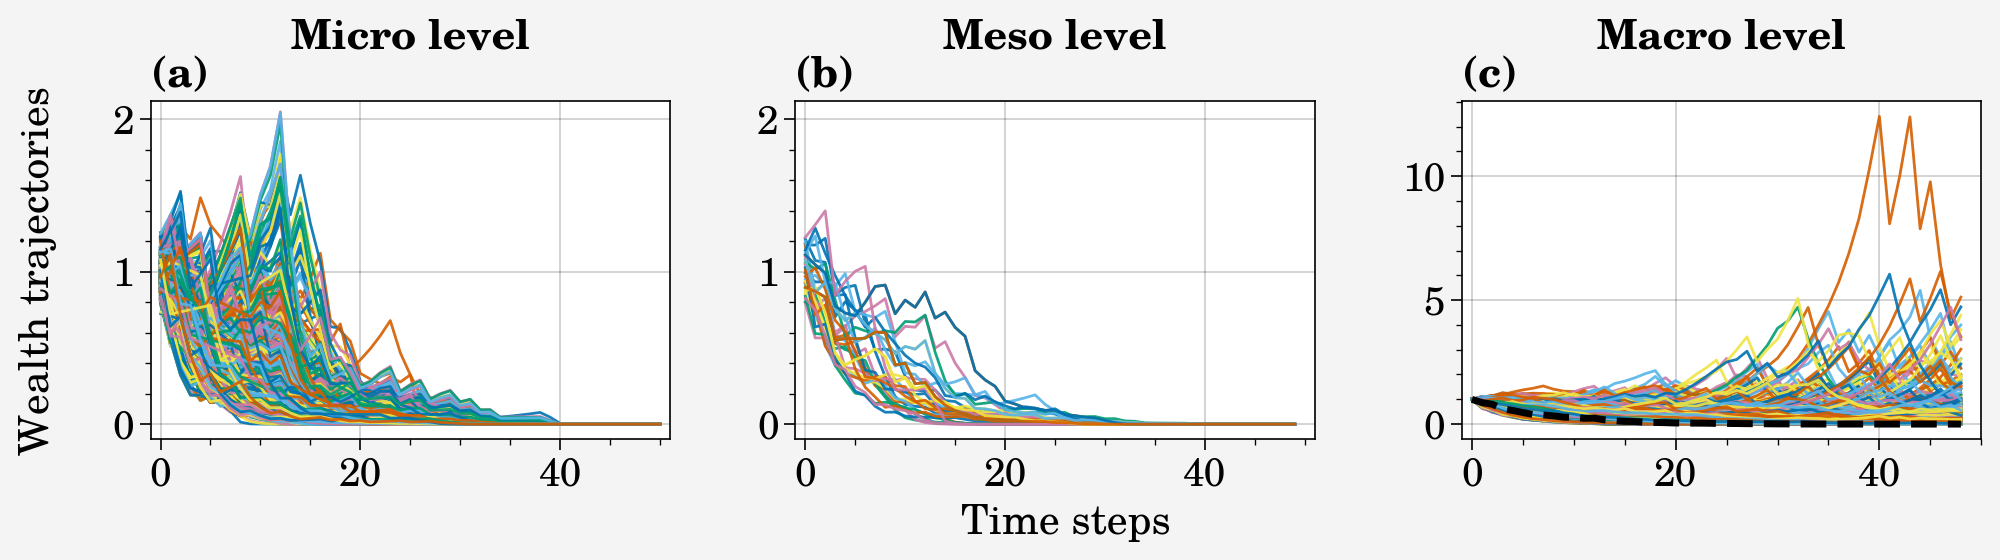

In [16]:
pplt.rc['tick.labelsize'] = 13

fig, axs = pplt.subplots(ncols=3, nrows=1, figsize=(10, 2.8), sharey=False, sharex=True)

for i in range(micro_data_original_shape.shape[1]):
    axs[0].plot(micro_data_original_shape[600][i][:], alpha=0.9, lw=1)
    axs[0].set_xlim(-1, 51)
    axs[0].set_ylim(-0.1, 2.12)

for i in range(meso_data_original_shape.shape[1]):
    axs[1].plot(meso_data_original_shape[600][i][:], alpha=0.9, lw=1)
    axs[1].set_xlim(-1, 51)
    axs[1].set_ylim(-0.1, 2.12)

for i in np.concatenate((np.arange(0, 600, 1), 
                         np.arange(601, macro_data_original_shape.shape[0], 1)), axis=None):
    axs[2].plot(macro_data_original_shape[i], alpha=0.9, lw=1)
    axs[2].set_xlim(-1, 50)
    
axs[2].plot(macro_data_original_shape[600], 
            color='black', 
            linestyle='--',
            alpha=1, lw=2.5)
    

axs.set_xlabel("Time steps")

axs[0].set_ylabel("Wealth trajectories\n ", fontsize=18)
axs[1].set_ylabel(" ")
axs[2].set_ylabel(" ")
    
for i, ax in enumerate(axs):
    ax.format(title=numbering[i], titleloc='left', 
              titlepad=5, titleweight='bold')
axs.format(toplabels=["Micro level", "Meso level", "Macro level"])

axs.format(rc_kw={'label.size': 15,
                  'tick.labelsize': 14,
                  'title.size': 15,
                  'toplabel.pad': 0.1,
                  'toplabel.color': "k"})

plt.tight_layout()
plt.savefig('plots/PT/PT3_all_traj_onerun.pdf',  dpi=300, bbox_inches='tight')
plt.show()

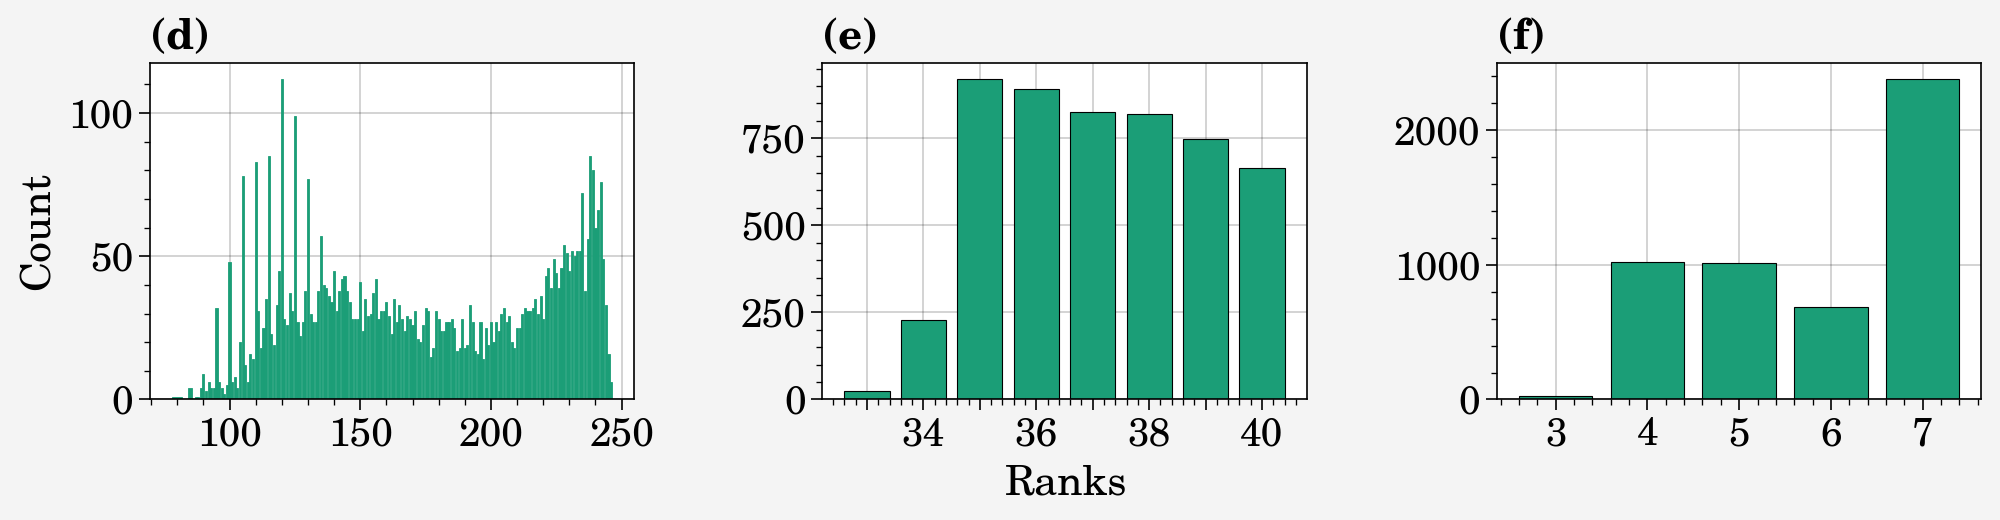

In [17]:
fig, axs = pplt.subplots(ncols=3, nrows=1, figsize=(10, 2.6), sharey=False, sharex=True)

# histograms
axs[0].bar(unique_micro, counts_micro, facecolor = '#1b9e77')

axs[1].bar(unique_meso, counts_meso, facecolor = '#1b9e77', edgecolor='k', linewidth=0.4)
xticks_label_meso = ['{}'.format(num) if num % 2 == 0 else ' ' for num in unique_meso]
axs[1].set_xticks(unique_meso, xticks_label_meso)

axs[2].bar(unique_macro, counts_macro, facecolor = '#1b9e77', edgecolor='k', linewidth=0.4)
xticks_label_macro = ['{}'.format(num) for num in unique_macro]
axs[2].set_xticks(unique_macro, xticks_label_macro)

for ax in axs:
    ax.set_xlabel(r"Ranks")
    
axs[0].set_ylabel("Count")
axs[1].set_ylabel(" ")
axs[2].set_ylabel(" ")
    
for i, ax in enumerate(axs):
    ax.format(title=numbering[i+3], titleloc='left', 
              titlepad=5, titleweight='bold')
    
axs.format(rc_kw={'label.size': 15,
                  'title.size': 15,
                  'tick.labelsize': 14,
                  'title.size': 15})
    
plt.tight_layout()
plt.savefig('plots/PT/PT3_hist_onerun.pdf', bbox_inches='tight')
plt.show()

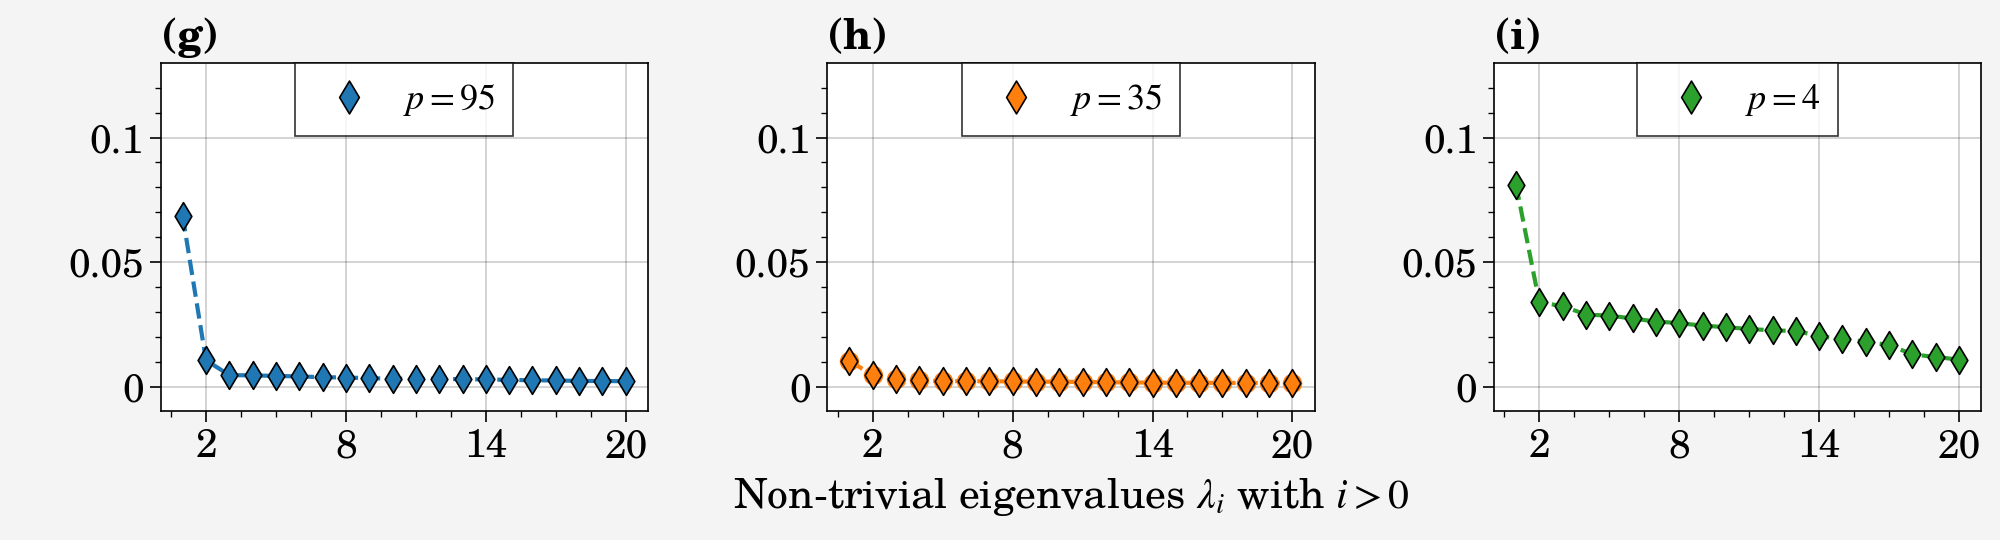

In [18]:
colors=mcp.gen_color(cmap="tab10",n=10)

ticks_x = np.linspace(2, 20, 4, dtype='int')

fig, axs = pplt.subplots(ncols=3, nrows=1, figsize=(10, 2.7), sharey=False, sharex=True)

# screeplots
x = np.arange(1, len(evals_micro_p_95[0]), 1)
axs[0].scatter(x, np.mean(evals_micro_p_95, axis=0)[1:],
               color=colors[0], label=r"$p=95$", 
               edgecolor="k", marker="d", 
               markersize=50, zorder=3)
axs[0].errorbar(x, np.mean(evals_micro_p_95, axis=0)[1:], 
                np.std(evals_micro_p_95, axis=0, ddof=1)[1:],
                color=colors[0],
                linestyle='--', capsize=4)

    
axs[1].scatter(x, np.mean(evals_meso_p_35, axis=0)[1:],
               color=colors[1], label=r"$p=35$", 
               edgecolor='k', marker="d", 
               markersize=50, zorder=3)
axs[1].errorbar(x,
                np.mean(evals_meso_p_35, axis=0)[1:], 
                np.std(evals_meso_p_35, axis=0, ddof=1)[1:],
                color=colors[1],
                linestyle='--', marker='o', capsize=4)
    
axs[2].scatter(x, np.mean(evals_macro_p_4, axis=0)[1:],
               color=colors[2], label=r"$p=4$", 
               edgecolor="k", marker="d", 
               markersize=50, zorder=3)
axs[2].errorbar(x, np.mean(evals_macro_p_4, axis=0)[1:], 
                np.std(evals_macro_p_4, axis=0, ddof=1)[1:],
                color=colors[2],
                linestyle='--', capsize=4)

    
for i, ax in enumerate(axs):
    ax.set_xticks(ticks_x,
                  ['{}'.format(num) for num in ticks_x])
    ax.set_ylabel(" ")
    ax.set_ylim(-0.01, 0.13)
    lgnd = ax.legend(fontsize=13, loc='uc')
    ax.set_xlabel(r'Non-trivial eigenvalues $\lambda_i$ with $i > 0$')
    lgnd.legendHandles[0]._sizes = [70]
    
for i, ax in enumerate(axs):
    ax.format(title=numbering[i+6], titleloc='left', 
              titlepad=5, titleweight='bold')

axs.format(rc_kw={'label.size': 15,
                  'tick.labelsize': 14,
                  'title.size': 15})
        
plt.tight_layout()

plt.savefig('plots/PT/PT3_screeplots_onerun_presentation.pdf', bbox_inches='tight')
plt.show()

## Scatterplots: diffusion coordinates

In [19]:
coord_data = [coords_micro_p_95, coords_meso_p_35, coords_macro_p_4]
g_data_all_runs = [d_coords_micro_p_95, d_coords_meso_p_35, d_coords_macro_p_4]

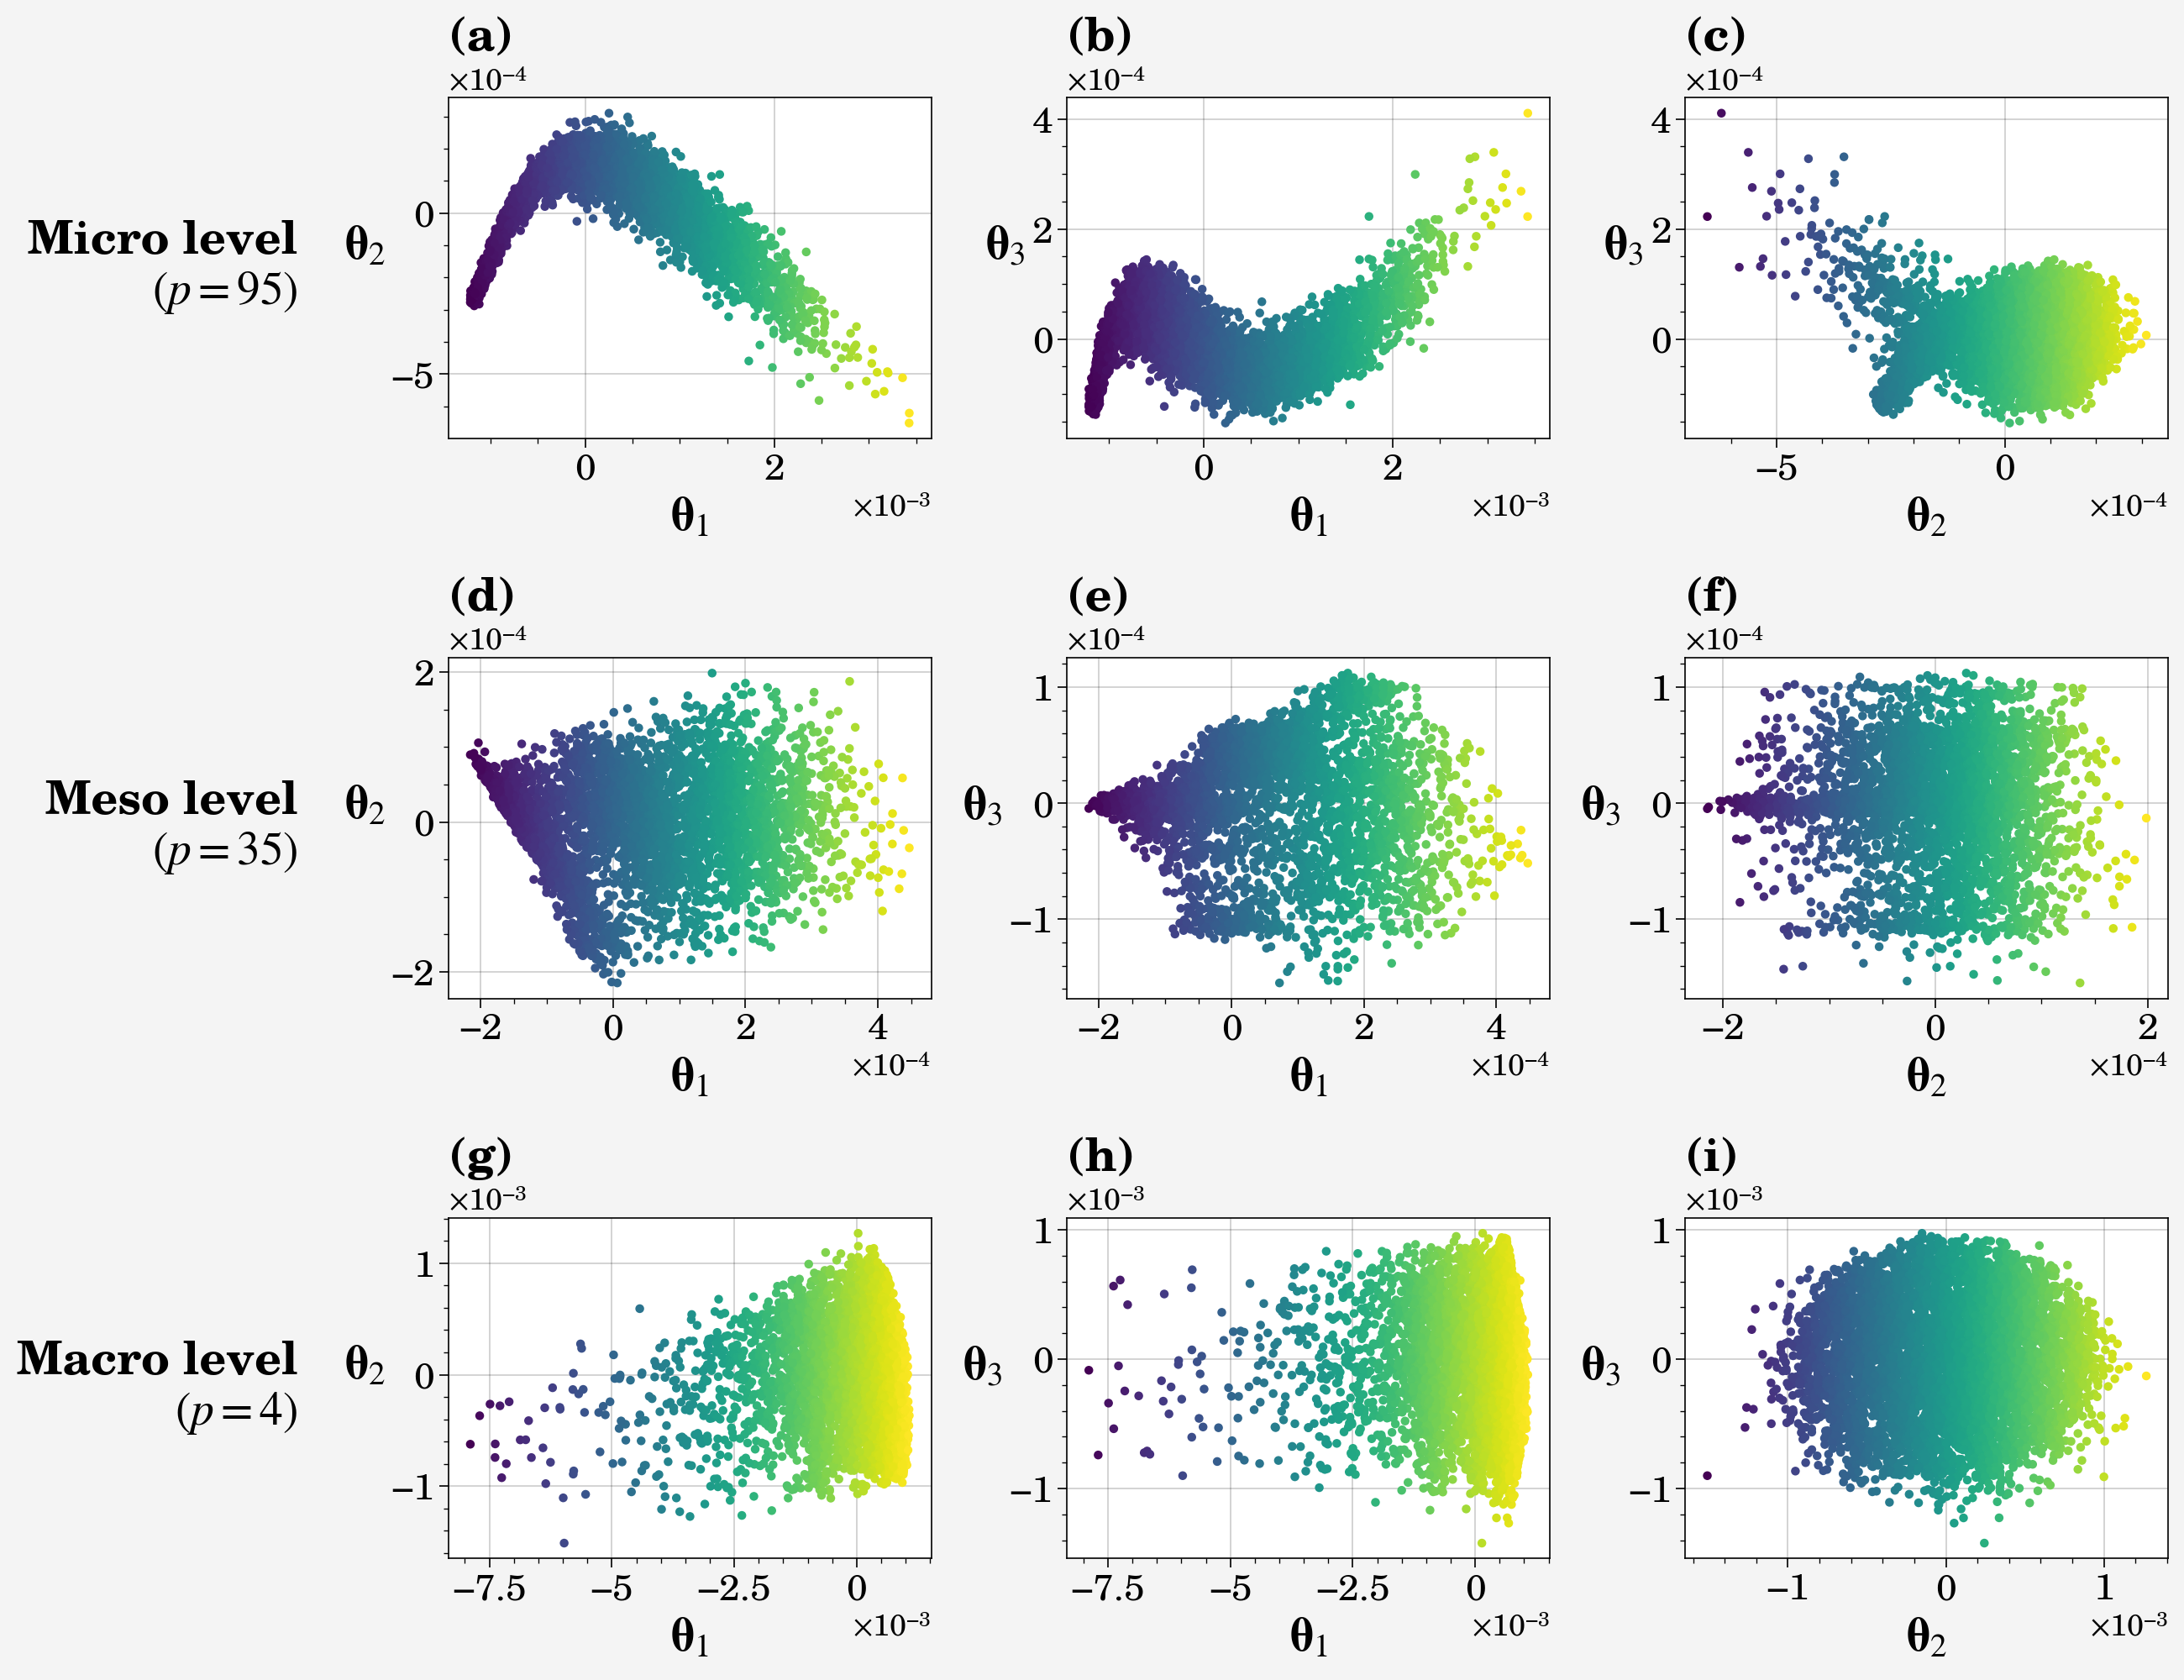

In [20]:
fig, axs = pplt.subplots(ncols=3, nrows=3, figsize=(13, 10), sharex=False, sharey=False)

for row, g_data in enumerate(g_data_all_runs):
    axs[row*3].scatter(g_data[:, 0], g_data[:, 1], 
                       c=g_data[:, 0], cmap='viridis', 
                       s=10)
#     edgecolors='k', linewidth=0.2)

    axs[row*3].format(xlabel=r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][0]))
    axs[row*3].set_ylabel(r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][1]),
                           labelpad=20)
    
    axs[row*3+1].scatter(g_data[:, 0], g_data[:, 2], 
                         c=g_data[:, 0], cmap='viridis', 
                         s=10)
#     edgecolors='k', linewidth=0.2)
    axs[row*3+1].format(xlabel=r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][0]))
    axs[row*3+1].set_ylabel(r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][2]),
                           labelpad=20)

    axs[row*3+2].scatter(g_data[:, 1], g_data[:, 2], 
                         c=g_data[:, 1], cmap='viridis', 
                         s=10)
#     edgecolors='k', linewidth=0.2)
    axs[row*3+2].format(xlabel=r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][1]))
    axs[row*3+2].set_ylabel(r"$\mathbf{\theta}$"+r"$_{{{}}}$".format(coord_data[row][2]),
                           labelpad=20)
    
    for ax in axs:
        ax.ticklabel_format(style="scientific", scilimits=(-2, -3))
        ax.format(abc='(a)',
                  rc_kw={'title.size': 17,
                         'label.size': 20,
                         'tick.labelsize': 16,
                         'abc.size':  20,
                         'title.pad': 20,
                         'leftlabel.size': 20,
                         'leftlabel.rotation': "horizontal",
                         'leftlabel.pad': 20.0,
                         'leftlabel.color': "k"})
        
axs.format(leftlabels=["Micro level\n"+r"$(p=95)$",
                       "Meso level\n"+r"$(p=35)$", 
                       "Macro level\n"+r"$(p=4)$"])

for i, ax in enumerate(axs):
    ax.yaxis.label.set(rotation='horizontal', ha='left')
    

fig.tight_layout()
plt.savefig(f'plots/PT/PT3_nonparsim_dcoords_onerun.pdf', dpi=300, bbox_inches='tight')
plt.show()       